In [90]:
%matplotlib inline
from collections import defaultdict
import glob
import os

from Bio.Seq import Seq
from gscripts.general import dataviz
import pandas as pd
import scipy

img_dir = "."

In [26]:
sequences = pd.read_excel("/home/gpratt/Dropbox/ad-hoc/Spike In v2 microarray set.xlsx", "Sheet1", index_col=0)
files = glob.glob("/home/jnussbac/projects/encode_mirna/analysis/b7p80_encode_mirna_miseq_v4/*rep*mate1")
mirna = pd.read_table("/home/jnussbac/ipython_notebooks/encode_mirna/spike_in_quantities_table", index_col=0, header=None, names=['miRNA', 'quantity'])

In [107]:
sequences['reverse_complement'] = sequences.dna_sequence.apply(lambda x: str(Seq(x).reverse_complement()))

In [28]:
result = defaultdict(dict)
for name, mir_control in sequences.dna_sequence.iteritems():
    for fn in files:
        count = !grep $mir_control $fn | wc -l
        count = count[0]
        result[name][os.path.basename(fn).split(".")[0]] = count
        
result = pd.DataFrame(result)

In [109]:
rc_result = defaultdict(dict)
for name, mir_control in sequences.reverse_complement.iteritems():
    for fn in files:
        count = !grep $mir_control $fn | wc -l
        count = count[0]
        rc_result[name][os.path.basename(fn).split(".")[0]] = count
        
rc_result = pd.DataFrame(rc_result)

In [111]:
result = result.T.join(mirna)
rc_result = rc_result.T.join(mirna)

0.0479409565389
-0.0628828955707
-0.115303751245
-0.127499404804
-0.812997743284
-4.9165786447
-0.869469286201
-0.140851918544
-0.643395334333
-0.117775072849
-0.270540974646
-0.381026151747
-0.493265061817
-0.188102112192
1.0


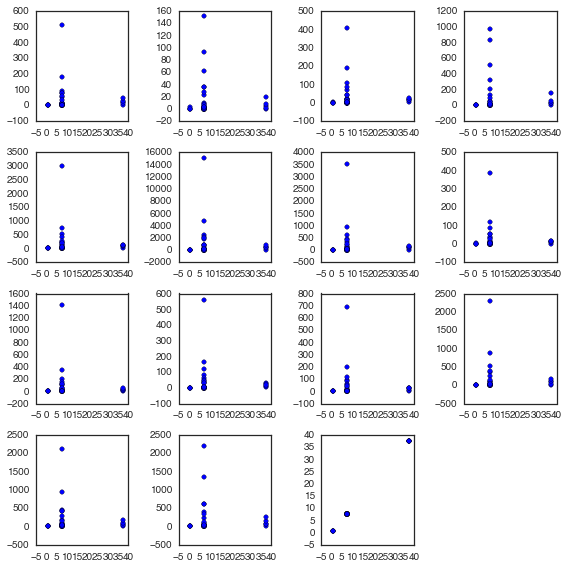

In [87]:
num_rows = (len(result.columns) + 1) / 4
num_cols = 4
with dataviz.Figure(os.path.join(img_dir, "control_change.svg"), figsize=(num_cols * 2, num_rows * 2)) as fig:
    for x, col in enumerate(result.columns):
        ax = fig.add_subplot(num_rows, num_cols, x + 1)
        ax.scatter(result['quantity'], result[col])
        print scipy.stats.linregress(result['quantity'].values, result[col].astype(float)).slope

In [125]:
len("CGCTTTTGCACATCGCATACC")

21

In [124]:
result.drop("quantity", axis=1).astype(float).sum(axis=1)

B7P80-501-1_S7_L001_R1_001       1241.0
B7P80-501-2_S1_L001_R1_001        504.0
B7P80-501-3_S3_L001_R1_001       1137.0
B7P80-A1_S2_L001_R1_001          3554.0
B7P80-A2_S9_L001_R1_001          6412.0
B7P80-A3-100_S14_L001_R1_001    34409.0
B7P80-A3-10_S11_L001_R1_001      7790.0
B7P80-A3-1_S10_L001_R1_001        907.0
B7P80-C-1_S4_L001_R1_001         2820.0
B7P80-C-2_S5_L001_R1_001         1306.0
B7P80-C-3_S6_L001_R1_001         1516.0
B7P80-D1_S12_L001_R1_001         5791.0
B7P80-D2_S13_L001_R1_001         5760.0
B7P80-D3_S8_L001_R1_001          6778.0
quantity                          505.5
dtype: float64

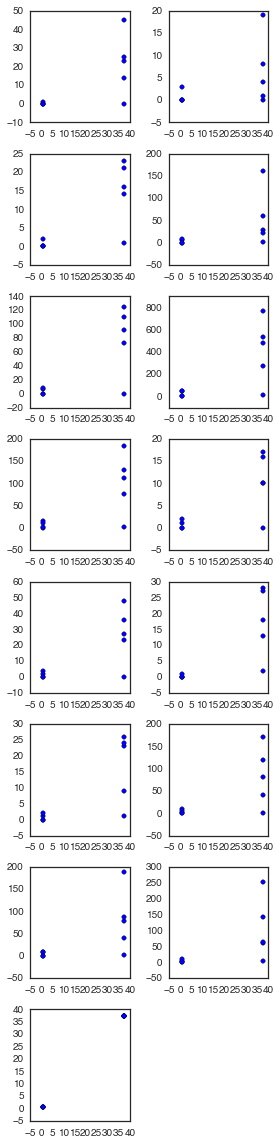

In [83]:
filtered_result = result[result['quantity'] != 7.50]

num_rows = (len(filtered_result.columns) + 1) / 2
num_cols = 2
with dataviz.Figure(os.path.join(img_dir, "control_change.svg"), figsize=(num_cols * 2, num_rows * 2)) as fig:
    for x, col in enumerate(filtered_result.columns):
        ax = fig.add_subplot(num_rows, num_cols, x + 1)
        ax.scatter(filtered_result['quantity'], filtered_result[col])
        #print scipy.stats.linregress(result['quantity'].values, result[col].astype(float))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0


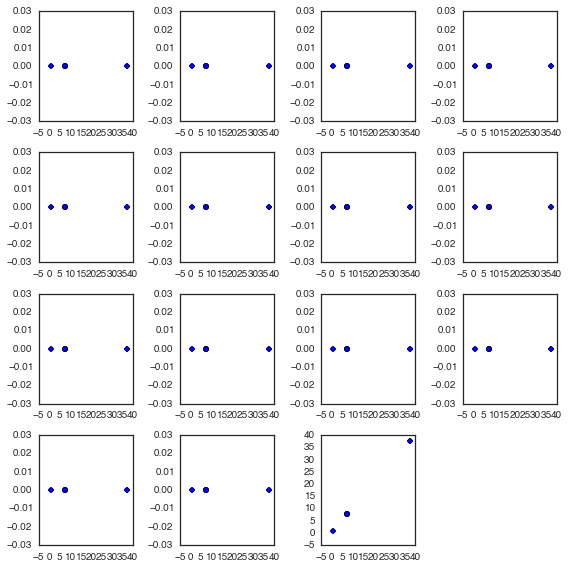

In [112]:
num_rows = (len(rc_result.columns) + 1) / 4
num_cols = 4
with dataviz.Figure(os.path.join(img_dir, "control_change.svg"), figsize=(num_cols * 2, num_rows * 2)) as fig:
    for x, col in enumerate(rc_result.columns):
        ax = fig.add_subplot(num_rows, num_cols, x + 1)
        ax.scatter(rc_result['quantity'], rc_result[col])
        print scipy.stats.linregress(rc_result['quantity'].values, rc_result[col].astype(float)).slope